# Lib

In [8]:
%load_ext autoreload
%autoreload 2

import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10000)


import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import sys
import os
import glob

if sys.platform=='win32':
    sys.path.insert(0,".\..\src")
        
elif sys.platform=='linux':
    sys.path.insert(0,"./../src")

from utils import utils_ml, parameters


In [4]:
if sys.platform=='win32':
    !dir .\
        
elif sys.platform=='linux':
    !ls ./

 O volume na unidade C � OS
 O N�mero de S�rie do Volume � C498-8BF5

 Pasta de c:\Users\caanp\OneDrive\Documents\repositories\ML-anti-fraud\notebooks

10/09/2022  23:30    <DIR>          .
11/09/2022  00:15    <DIR>          ..
10/09/2022  23:28    <DIR>          .ipynb_checkpoints
14/11/2022  20:51           634.701 1.EA.ipynb
               1 arquivo(s)        634.701 bytes
               3 pasta(s)   363.758.264.320 bytes dispon�veis


In [5]:
!dir .\..\src

 O volume na unidade C � OS
 O N�mero de S�rie do Volume � C498-8BF5

 Pasta de c:\Users\caanp\OneDrive\Documents\repositories\ML-anti-fraud\src

11/09/2022  00:34    <DIR>          .
11/09/2022  00:15    <DIR>          ..
11/09/2022  00:39    <DIR>          utils
11/09/2022  00:21    <DIR>          __pycache__
               0 arquivo(s)              0 bytes
               4 pasta(s)   363.758.264.320 bytes dispon�veis


# Reading

In [6]:
## para saber en que directório uno se encuentra
#
if sys.platform=='win32':
    !echo %cd%
        
elif sys.platform=='linux':
    !pwd

c:\Users\caanp\OneDrive\Documents\repositories\ML-anti-fraud\notebooks


In [1058]:
if sys.platform=='win32':
    df = pd.read_csv('.\..\data\dados.csv')
        
elif sys.platform=='linux':
    df = pd.read_csv('./../data/dados.csv')


## dropping column "o" becaise it has 78% missing. and this is a boolean columns
# df.drop("o", axis=1, inplace=True)

# EA

In [1059]:
df.rename(columns={"a":"a_int",
                    "p":"p_boolean","n":'n_boolean',
                     "k":"k_float","e":"e_float","h":"h_float","l":"l_float","f":"f_float","m":"m_float","m":"m_float","b":"b_float","c":"c_float","d":"d_float","o":"o_obj",
                     'i': 'produto','j':'categoria_produto','g':'pais'}
       , inplace = True)

## Transform categorical features
df['n_boolean'] = df['n_boolean'].astype("category")
df['p_boolean'] = df['p_boolean'].astype("category")


## creating columns os date and hour
df['data'] = df['fecha'].apply(lambda x: x[:10])
df['hora'] = df['fecha'].apply(lambda x: x[10:])

In [1060]:
miss_df = utils_ml.missing_zeros(df)
miss_df.sort_values(by="T_missing").reset_index(drop=True)

## Tabela permite analisar a distribuição da variável caso seja contínua e verificar a possibilidade de preencher com a media ou mediana dado o cv.
## Para variáveis númericas, temos a moda e a frequência desta.


Column  size MB      Type  T_rows  Cardinality  T_missing  T_zeros  %_missing  %_zeros                                         Mode      freq           mean            std       min       25%        50%          75%          max         cv
0               a_int     1.14     int64  150000            4          0        0      0.000    0.000                                                              3.705407       0.753206       1.0       4.0        4.0          4.0          4.0   0.203272
1              fraude     1.14     int64  150000            2          0        0      0.000    0.000                                                                  0.05       0.217946       0.0       0.0        0.0          0.0          1.0   4.358913
2               score     1.14     int64  150000          101          0        0      0.000    0.000                                                              48.06624      28.995122       0.0      23.0       48.0         73.0        100.0   0.603233
3               monto     1.14   float64  150000        17831          0        0      0.000    0.000                                                             43.523134      91.557888      0.02      9.38      20.61      40.6925      3696.35    2.10366
4               fecha    10.87    object  150000       145813          0        0      0.000    0.000                          2020-03-19 15:30:23         4                                                                                                  
5           p_boolean     0.14  category  150000            2          0        0      0.000    0.000                                            Y     83129                                                                                                  
6           n_boolean     0.14  category  150000            2          0        0      0.000    0.000                                          1.0  135353.0                                                                                                  
7                data     9.58    object  150000           45          0        0      0.000    0.000                                   2020-04-20      5314                                                                                                  
8   categoria_produto     9.73    object  150000         8324          0        0      0.000    0.000                                  cat_43b9c10      2331                                                                                                  
9             k_float     1.14   float64  150000       150000          0        0      0.000    0.000                                                              0.497532       0.288348  0.000004  0.246819    0.49599     0.746508     0.999995   0.579555
10            h_float     1.14     int64  150000           59          0        0      0.000    0.000                                                             14.193513      14.161216       0.0       3.0        9.0         21.0         58.0   0.997725
11            e_float     1.14   float64  150000        43208          0    65055      0.000   43.370                                                              0.220641       2.434995       0.0       0.0   0.104875     0.282938   833.333333  11.035995
12            produto    20.95    object  150000       127804          0        0      0.000    0.000  Fone De Ouvido Sem Fio Xiaomi Airdots Preto        83                                                                                                  
13               hora     9.44    object  150000        60545          0        0      0.000    0.000                                     10:00:08        12                                                                                                  
14            l_float     1.14   float64  150000         7297         11     2030      0.007    1.353                                                           2305.409403    1712.379601    

# Association

In [1154]:
cats_cols = utils_ml.list_subset_words( df.columns.tolist() , ["bool","cat",'obj','pais'])

In [1155]:
df_chi_ls = []

for cat_column in cats_cols:


    df_chi = utils_ml.chi_square_test(df, 'fraude', cat_column )
    df_chi.rename({"Variable_1":"Target"}, axis=1, inplace=True)

    df_chi_ls.append(df_chi)

df_chi2 = pd.concat(df_chi_ls)

In [1156]:
df_chi2

Target         Variable_2        p-value p_value_result                 result
0  fraude          n_boolean   0.000000e+00      p <= 0.05  Dependent (reject H0)
0  fraude          p_boolean   0.000000e+00      p <= 0.05  Dependent (reject H0)
0  fraude  categoria_produto  2.634339e-112      p <= 0.05  Dependent (reject H0)
0  fraude              o_obj   0.000000e+00      p <= 0.05  Dependent (reject H0)
0  fraude               pais   7.757972e-63      p <= 0.05  Dependent (reject H0)

In [1194]:
numeric_cols = [x for x in df.columns.tolist() if df[x].dtype!="O" and df[x].dtype!="category" and x!="fraude" ]

corr = df[numeric_cols].corr("kendall")

c:\Users\caanp\miniconda3\envs\venv_ml\lib\site-packages\scipy\stats\_stats_py.py:5215: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


<AxesSubplot:>

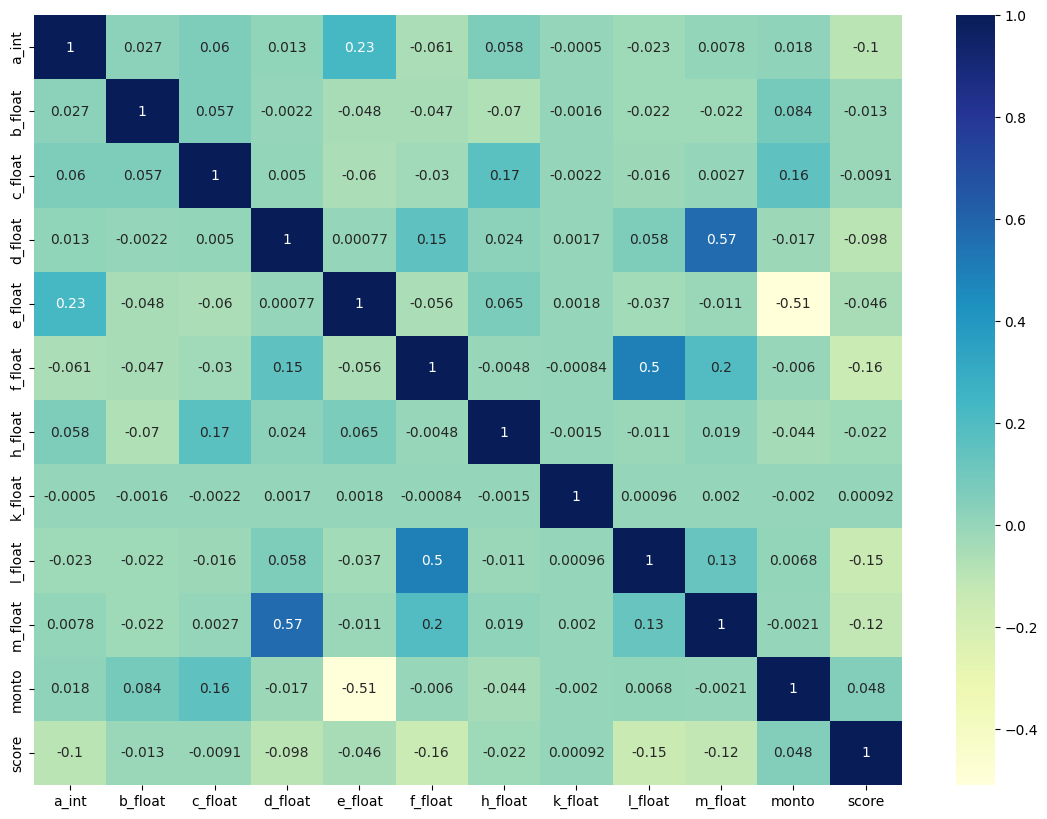

In [1195]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(corr,  annot=True,cmap="YlGnBu" )

<AxesSubplot:xlabel='d_float', ylabel='d_float'>

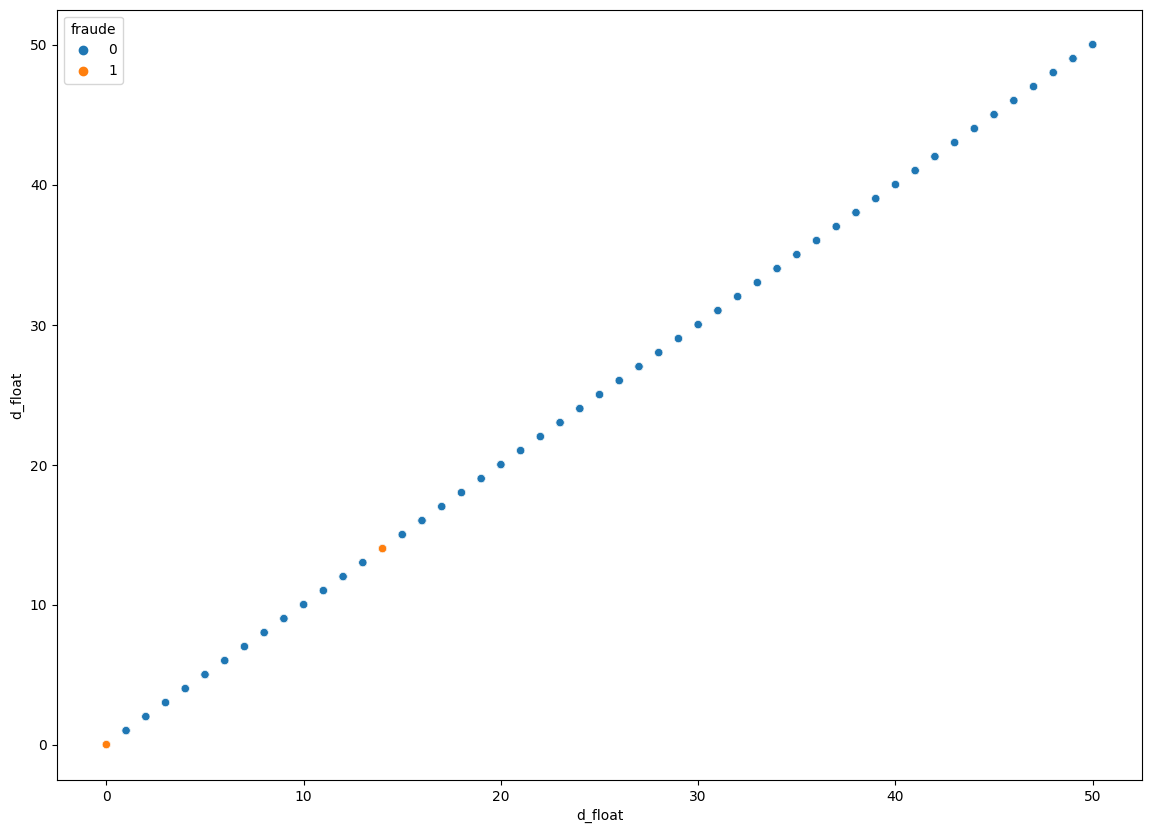

In [1199]:
f, ax = plt.subplots(figsize=(14, 10))
sns.scatterplot( df, x="d_float", y="d_float", hue="fraude" )

<AxesSubplot:xlabel='d_float', ylabel='m_float'>

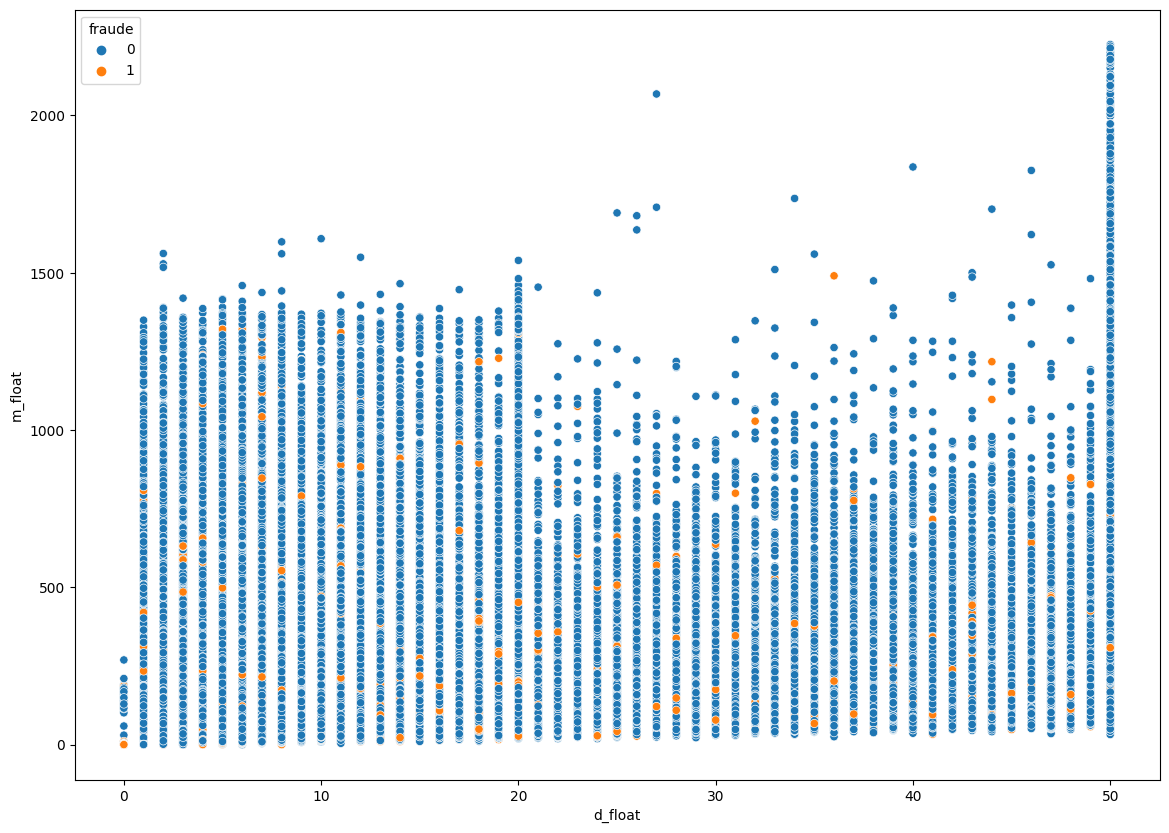

In [1200]:
f, ax = plt.subplots(figsize=(14, 10))
sns.scatterplot( df, x="d_float", y="m_float", hue="fraude" )

<AxesSubplot:xlabel='f_float', ylabel='l_float'>

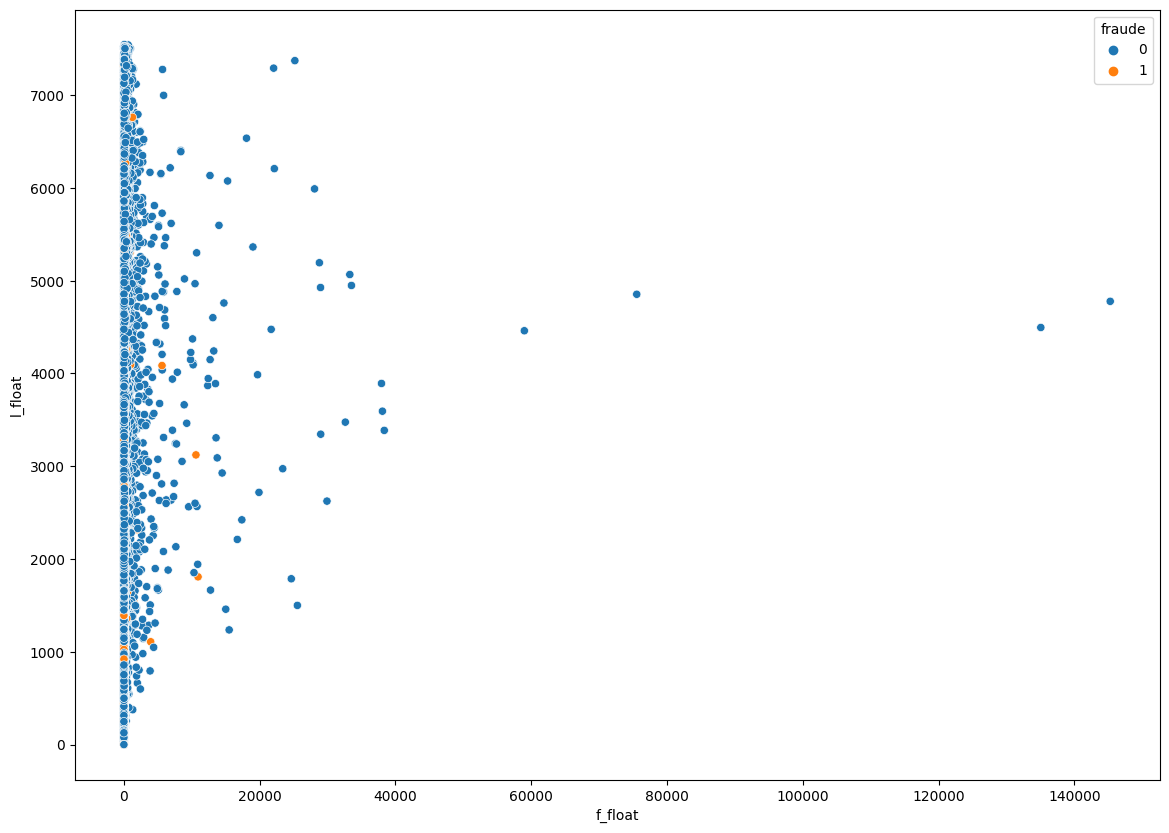

In [1201]:
f, ax = plt.subplots(figsize=(14, 10))
sns.scatterplot( df, x="f_float", y="l_float",hue="fraude" )

# IV and WoE

In [923]:
from ipywidgets import *

In [1035]:
df_ivs_ls = []

for variable in df.columns.tolist():

    label = "fraude"
    dtype_ = 'categorical' if df[variable].dtype=='O' or df[variable].dtype=='category' else 'numerical'

    df_iv = utils_ml.WOE_IV(df = df , variable = variable, dtype_ = dtype_ , label = label, monotonic= True)[[ 'variable' , 'IV_var', 'KS']].drop_duplicates()

    df_ivs_ls.append(df_iv)

pd.concat(df_ivs_ls).sort_values("IV_var", ascending=False)

In [1037]:
@interact

def display_metrics(variable = pd.concat(df_ivs_ls).sort_values("IV_var", ascending=False)['variable'].tolist() ):

    label = "fraude"
    dtype_ = 'categorical' if df[variable].dtype=='O' or df[variable].dtype=='category'  else 'numerical'

    display(utils_ml.WOE_IV(df = df , variable = variable, dtype_ = dtype_ , label = label, monotonic= True))




interactive(children=(Dropdown(description='variable', options=('fecha', 'produto', 'hora', 'categoria_produto…

# WoE transformation

In [994]:
variable = "o_obj"

label = "fraude"
dtype_ = 'categorical' if df[variable].dtype=='O' or df[variable].dtype=='category' else 'numerical'
monotonic = True
save_path_pkl = '.\..\src\\features\\'


dff = utils_ml.encode_woe_var(df, variable, label, dtype_, monotonic = True, save_path_pkl = None )

dff[[f"{variable}_bins",f"{variable}_cat",f"{variable}_WoE"]].value_counts(dropna = False, sort = False)

o_obj_bins  o_obj_cat  o_obj_WoE
-1          Missing    0.919696     108857
0           ['Y']      0.270113      24091
1           ['N']      1.664209      17052
dtype: int64

# Metrics to model: score column

In [974]:
probability = "score"
label="fraude"
quantil=5

utils_ml.metric_evaluation(df, probability, label, quantil)


total faixa_prob  total_um  total_zero    TP      FP      TN    FN    perc_um  perc_zero     csum_um   csum_zero         ks    recall  precision  specificity        F1        F2
quantil                                                                                                                                                                                   
0        30000    [0, 18]      1111       28889  7500  142500       0     0  14.813333  20.272982   14.813333   20.272982  41.964912  1.000000   0.050000     0.000000  0.095238  0.208333
1        30000   [18, 38]       537       29463  6389  113611   28889  1111   7.160000  20.675789   21.973333   40.948772  41.964912  0.851867   0.053242     0.202730  0.100220  0.212967
2        30000   [38, 58]       286       29714  5852   84148   58352  1648   3.813333  20.851930   25.786667   61.800702  41.964912  0.780267   0.065022     0.409488  0.120041  0.243833
3        30000   [58, 78]      1076       28924  5566   54434   88066  1934  14.346667  20.297544   40.133333   82.098246  41.964912  0.742133   0.092767     0.618007  0.164919  0.309222
4        30000  [78, 100]      4490       25510  4490   25510  116990  3010  59.866667  17.901754  100.000000  100.000000  41.964912  0.598667   0.149667     0.820982  0.239467  0.374167

<AxesSubplot:ylabel='Frequency'>

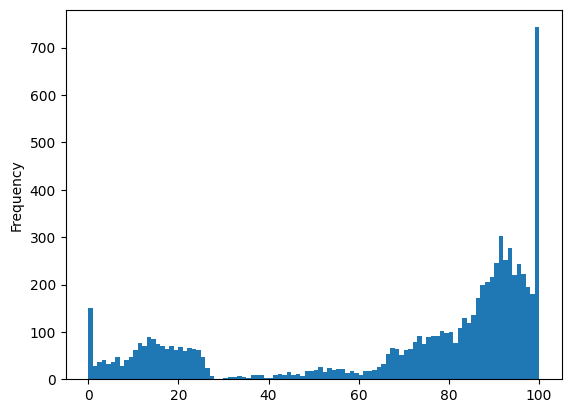

In [1202]:
df.loc[df['fraude']==1,'score'].plot(kind='hist', bins=100)

<AxesSubplot:ylabel='Frequency'>

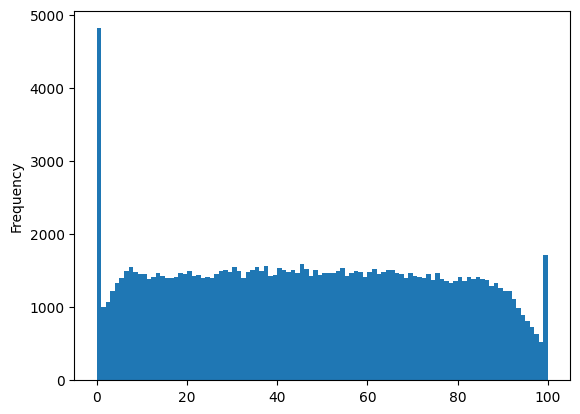

In [1203]:
df.loc[df['fraude']==0,'score'].plot(kind='hist', bins=100)

<AxesSubplot:ylabel='Frequency'>

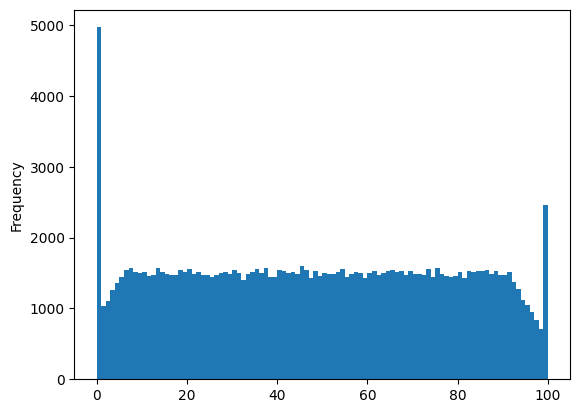

In [1206]:
df.loc[:,'score'].plot(kind='hist', bins=100)

# requirements

In [14]:
!pip list --format=freeze > $parameters.root\\requirements.txt
